In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

%matplotlib inline

In [103]:
def get_members_CROSS(i, j, shape, N):
    members = []
    A = N//2
    (m, n) = shape
    for k in range(-1*A, A+1):
        if(i>=k and m > (i-k)):
            members.append([i-k, j])
        if(j>=k and n > (j-k) and k!=0):
            members.append([i, j-k])
    return members

def get_members_SQUARE(i, j, shape, N):
    members = []
    A = N//2
    (m, n) = shape
    for p in range(-1*A, A+1):
        for q in range(-1*A, A+1):
            if((i-p)>=0 and (i-p)<m and (j-q)>=0 and (j-q)<n):
                members.append([i-p, j-q])
        
    return members

def DILATE(I, B):
    Image = I.copy()
    m, n = Image.shape
    if [*B][0] == 'CROSS':
        for i in range(m):
            for j in range(n):
                members = get_members_CROSS(i, j, Image.shape, B[[*B][0]])
                ans = False
                for member in members:
                    ans = ans or (I[member[0], member[1]] == 1)
                Image[i, j] = 1 if ans else 0
        
    elif [*B][0] == 'SQUARE':
        for i in range(m):
            for j in range(n):
                members = get_members_SQUARE(i, j, Image.shape, B[[*B][0]])
                ans = False
                for member in members:
                    ans = ans or (I[member[0], member[1]] == 1)
                Image[i, j] = 1 if ans else 0
    return Image

def ERODE(I, B):
    Image = I.copy()
    m, n = Image.shape
    if [*B][0] == 'CROSS':
        for i in range(m):
            for j in range(n):
                members = get_members_CROSS(i, j, Image.shape, B[[*B][0]])
                ans = True
                for member in members:
                    ans = ans and (I[member[0], member[1]] == 1)
                Image[i, j] = 1 if ans else 0
        
    elif [*B][0] == 'SQUARE':
        for i in range(m):
            for j in range(n):
                members = get_members_SQUARE(i, j, Image.shape, B[[*B][0]])
                ans = True
                for member in members:
                    ans = ans and (I[member[0], member[1]] == 1)
                Image[i, j] = 1 if ans else 0
    return Image

def MEDIAN(I, B):
    Image = I.copy()
    m, n = Image.shape
    if [*B][0] == 'CROSS':
        for i in range(m):
            for j in range(n):
                members = get_members_CROSS(i, j, Image.shape, B[[*B][0]])
                count = [0, 0]
                for member in members:
                    if(Image[member[0], member[1]] == 0):
                        count[0] += 1
                    else:
                        count[1] += 1
                Image[i, j] = 0 if (count[0] > count[1]) else 1
        
    elif [*B][0] == 'SQUARE':
        for i in range(m):
            for j in range(n):
                members = get_members_SQUARE(i, j, Image.shape, B[[*B][0]])
                count = [0, 0]
                for member in members:
                    if(Image[member[0], member[1]] == 0):
                        count[0] += 1
                    else:
                        count[1] += 1
                Image[i, j] = 0 if (count[0] > count[1]) else 1
    return Image

In [92]:
bin_apc = mpimg.imread('apc.png')
bin_airport = mpimg.imread('airport.png')
bin_airplane = mpimg.imread('airplane.png')
bin_truck = mpimg.imread('truck.png')

### DILATE

In [98]:
bin_apc_dia_cr = DILATE(bin_apc, {'CROSS': 5})
bin_apc_dia_sq = DILATE(bin_apc, {'SQUARE': 3})

bin_airport_dia_cr = DILATE(bin_airport, {'CROSS': 5})
bin_airport_dia_sq = DILATE(bin_airport, {'SQUARE': 3})

bin_airplane_dia_cr = DILATE(bin_airplane, {'CROSS': 5})
bin_airplane_dia_sq = DILATE(bin_airplane, {'SQUARE': 3})

bin_truck_dia_cr = DILATE(bin_truck, {'CROSS': 5})
bin_truck_dia_sq = DILATE(bin_truck, {'SQUARE': 3})

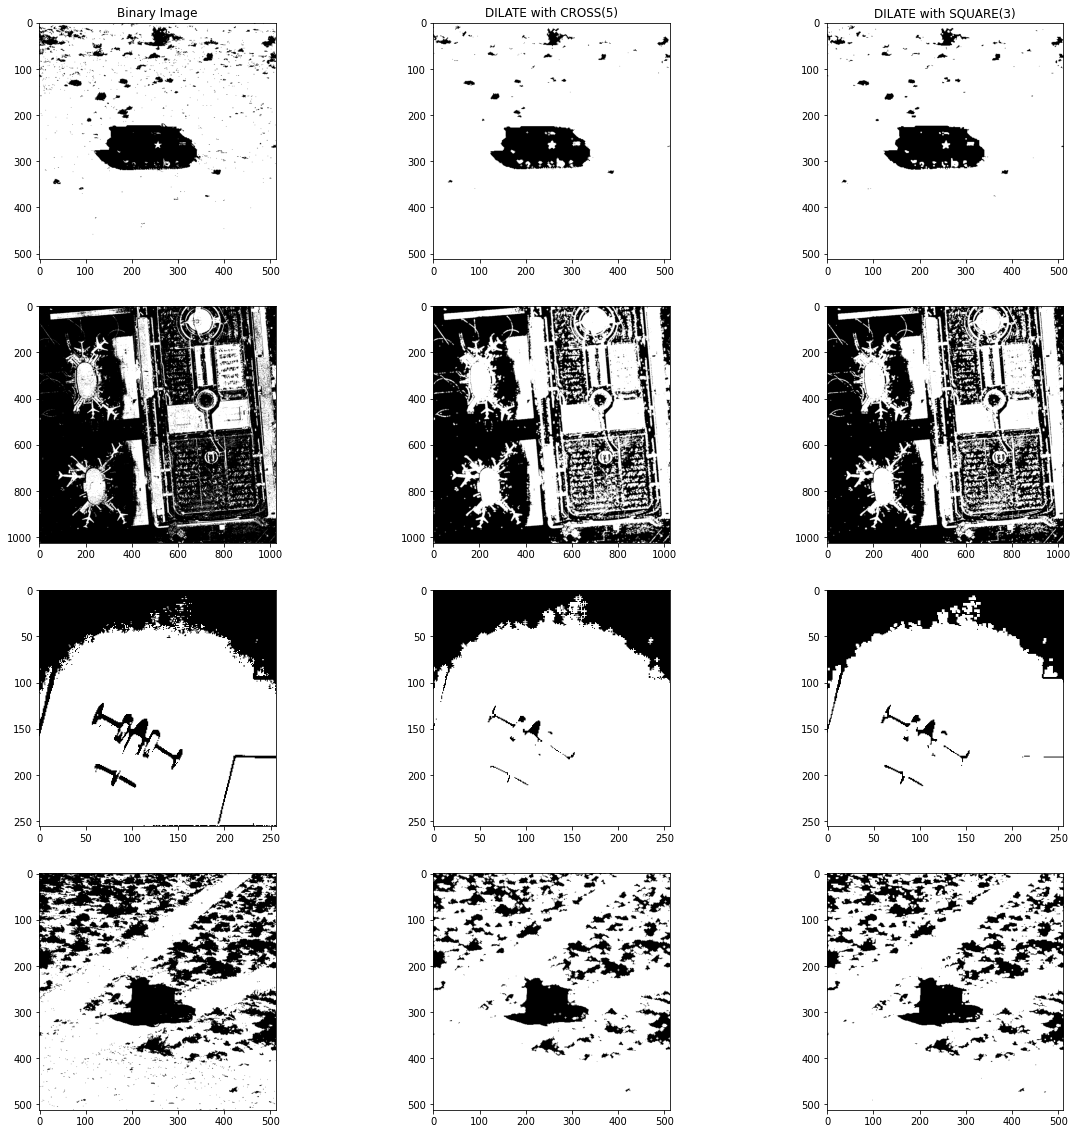

In [99]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(4, 3, 2)
plt.title("DILATE with CROSS(5)")
plt.imshow(bin_apc_dia_cr, cmap='gray')

plt.subplot(4, 3, 3)
plt.title("DILATE with SQUARE(3)")
plt.imshow(bin_apc_dia_sq, cmap='gray')

plt.subplot(4, 3, 4)
plt.imshow(bin_airport, cmap='gray')

plt.subplot(4, 3, 5)
plt.imshow(bin_airport_dia_cr, cmap='gray')

plt.subplot(4, 3, 6)
plt.imshow(bin_airport_dia_sq, cmap='gray')

plt.subplot(4, 3, 7)
plt.imshow(bin_airplane, cmap='gray')

plt.subplot(4, 3, 8)
plt.imshow(bin_airplane_dia_cr, cmap='gray')

plt.subplot(4, 3, 9)
plt.imshow(bin_airplane_dia_sq, cmap='gray')

plt.subplot(4, 3, 10)
plt.imshow(bin_truck, cmap='gray')

plt.subplot(4, 3, 11)
plt.imshow(bin_truck_dia_cr, cmap='gray')

plt.subplot(4, 3, 12)
plt.imshow(bin_truck_dia_sq, cmap='gray')

### ERODE

In [100]:
bin_apc_ero_cr = ERODE(bin_apc, {'CROSS': 5})
bin_apc_ero_sq = ERODE(bin_apc, {'SQUARE': 3})

bin_airport_ero_cr = ERODE(bin_airport, {'CROSS': 5})
bin_airport_ero_sq = ERODE(bin_airport, {'SQUARE': 3})

bin_airplane_ero_cr = ERODE(bin_airplane, {'CROSS': 5})
bin_airplane_ero_sq = ERODE(bin_airplane, {'SQUARE': 3})

bin_truck_ero_cr = ERODE(bin_truck, {'CROSS': 5})
bin_truck_ero_sq = ERODE(bin_truck, {'SQUARE': 3})

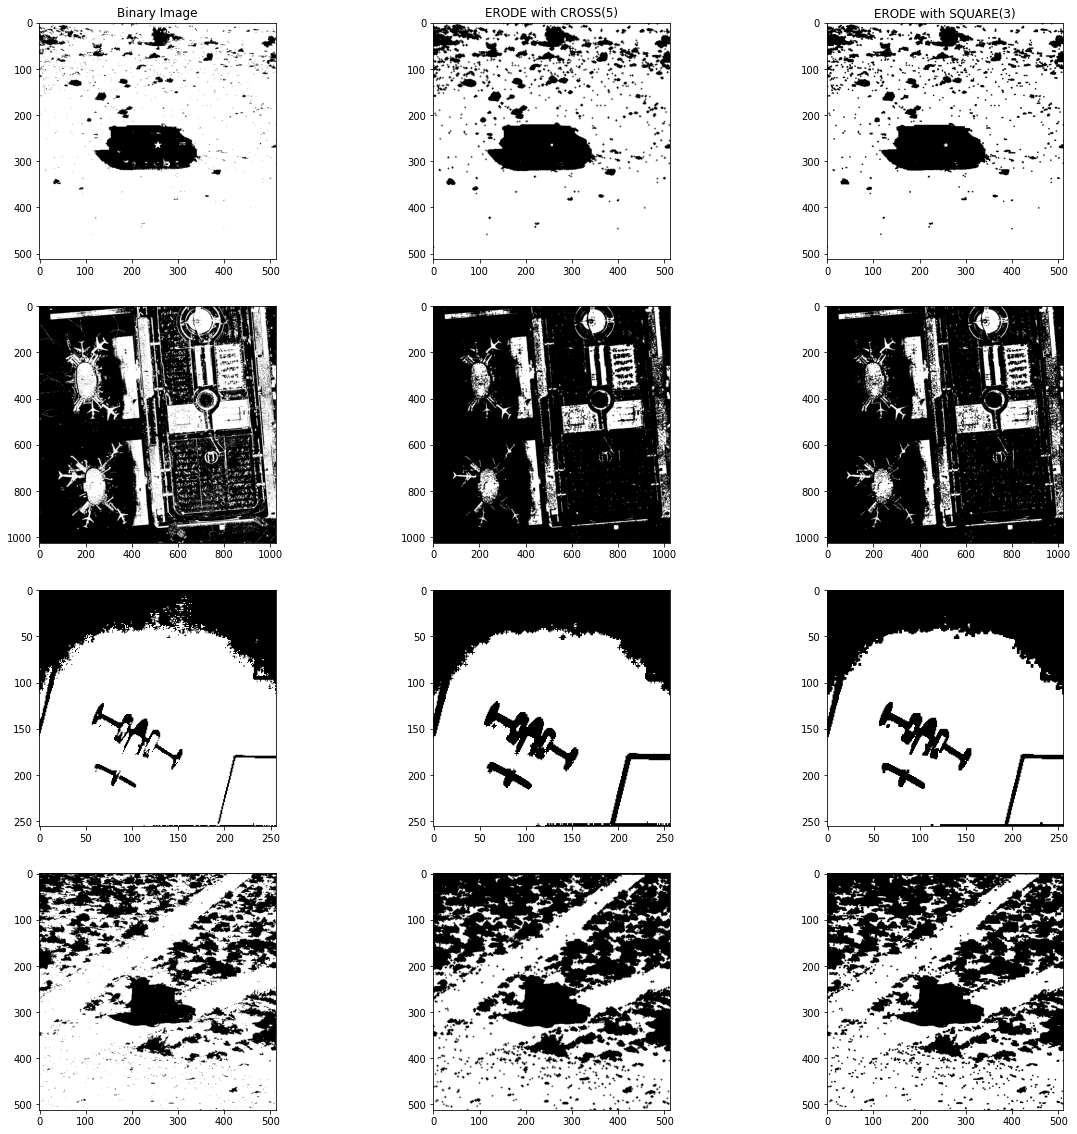

In [102]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(4, 3, 2)
plt.title("ERODE with CROSS(5)")
plt.imshow(bin_apc_ero_cr, cmap='gray')

plt.subplot(4, 3, 3)
plt.title("ERODE with SQUARE(3)")
plt.imshow(bin_apc_ero_sq, cmap='gray')

plt.subplot(4, 3, 4)
plt.imshow(bin_airport, cmap='gray')

plt.subplot(4, 3, 5)
plt.imshow(bin_airport_ero_cr, cmap='gray')

plt.subplot(4, 3, 6)
plt.imshow(bin_airport_ero_sq, cmap='gray')

plt.subplot(4, 3, 7)
plt.imshow(bin_airplane, cmap='gray')

plt.subplot(4, 3, 8)
plt.imshow(bin_airplane_ero_cr, cmap='gray')

plt.subplot(4, 3, 9)
plt.imshow(bin_airplane_ero_sq, cmap='gray')

plt.subplot(4, 3, 10)
plt.imshow(bin_truck, cmap='gray')

plt.subplot(4, 3, 11)
plt.imshow(bin_truck_ero_cr, cmap='gray')

plt.subplot(4, 3, 12)
plt.imshow(bin_truck_ero_sq, cmap='gray')

### MEDIAN

In [104]:
bin_apc_mea_cr = MEDIAN(bin_apc, {'CROSS': 5})
bin_apc_mea_sq = MEDIAN(bin_apc, {'SQUARE': 3})

bin_airport_mea_cr = MEDIAN(bin_airport, {'CROSS': 5})
bin_airport_mea_sq = MEDIAN(bin_airport, {'SQUARE': 3})

bin_airplane_mea_cr = MEDIAN(bin_airplane, {'CROSS': 5})
bin_airplane_mea_sq = MEDIAN(bin_airplane, {'SQUARE': 3})

bin_truck_mea_cr = MEDIAN(bin_truck, {'CROSS': 5})
bin_truck_mea_sq = MEDIAN(bin_truck, {'SQUARE': 3})

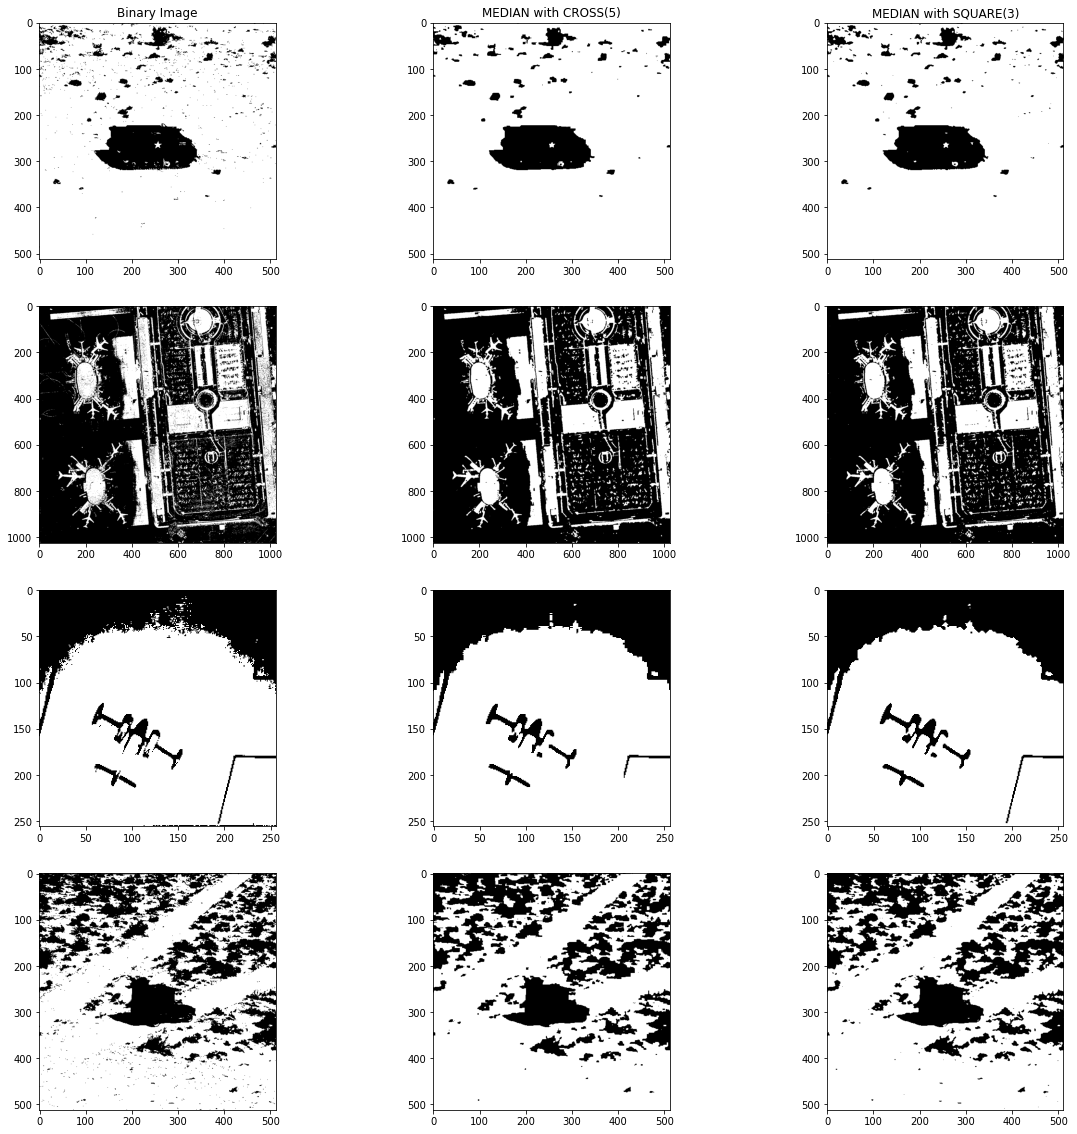

In [114]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(4, 3, 2)
plt.title("MEDIAN with CROSS(5)")
plt.imshow(bin_apc_mea_cr, cmap='gray')

plt.subplot(4, 3, 3)
plt.title("MEDIAN with SQUARE(3)")
plt.imshow(bin_apc_mea_sq, cmap='gray')

plt.subplot(4, 3, 4)
plt.imshow(bin_airport, cmap='gray')

plt.subplot(4, 3, 5)
plt.imshow(bin_airport_mea_cr, cmap='gray')

plt.subplot(4, 3, 6)
plt.imshow(bin_airport_mea_sq, cmap='gray')

plt.subplot(4, 3, 7)
plt.imshow(bin_airplane, cmap='gray')

plt.subplot(4, 3, 8)
plt.imshow(bin_airplane_mea_cr, cmap='gray')

plt.subplot(4, 3, 9)
plt.imshow(bin_airplane_mea_sq, cmap='gray')

plt.subplot(4, 3, 10)
plt.imshow(bin_truck, cmap='gray')

plt.subplot(4, 3, 11)
plt.imshow(bin_truck_mea_cr, cmap='gray')

plt.subplot(4, 3, 12)
plt.imshow(bin_truck_mea_sq, cmap='gray')

In [108]:
def NOT(I):
    Image = I.copy()
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if(I[i, j]==0):
                Image[i, j] = 1
            else:
                Image[i, j] = 0
    return Image

### Duality verification of DILATE and ERODE
#### (a) DILATE = NOT(ERODE(NOT))

Difference between direct and complement path is zero.


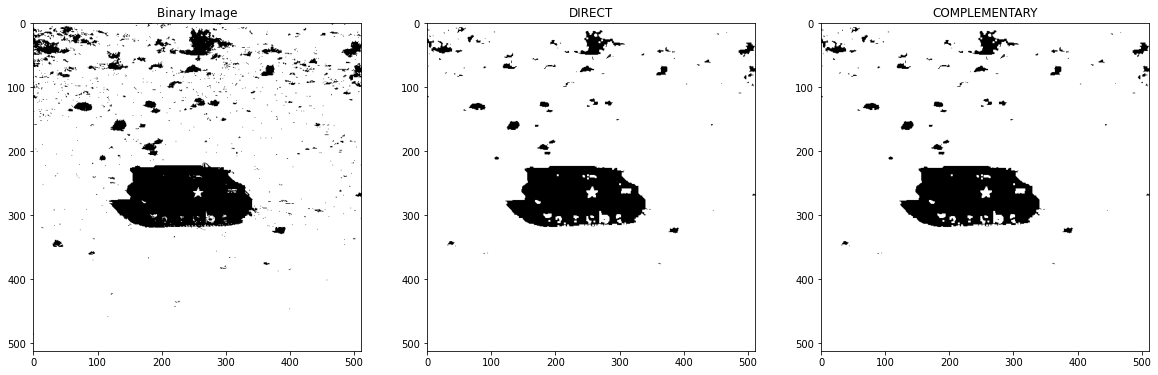

In [110]:
bin_apc_dia_c = NOT(ERODE(NOT(bin_apc), {'SQUARE':3}))
if np.all(bin_apc_dia_sq == bin_apc_dia_c):
    print("Difference between direct and complement path is zero.")
else:
    print("Difference between direct and complement path is not zero.")
    
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(1, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("DIRECT")
plt.imshow(bin_apc_dia_sq, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("COMPLEMENTARY")
plt.imshow(bin_apc_dia_c, cmap='gray')

#### (b) ERODE = NOT(DILATE(NOT))

Difference between direct and complement path is zero.


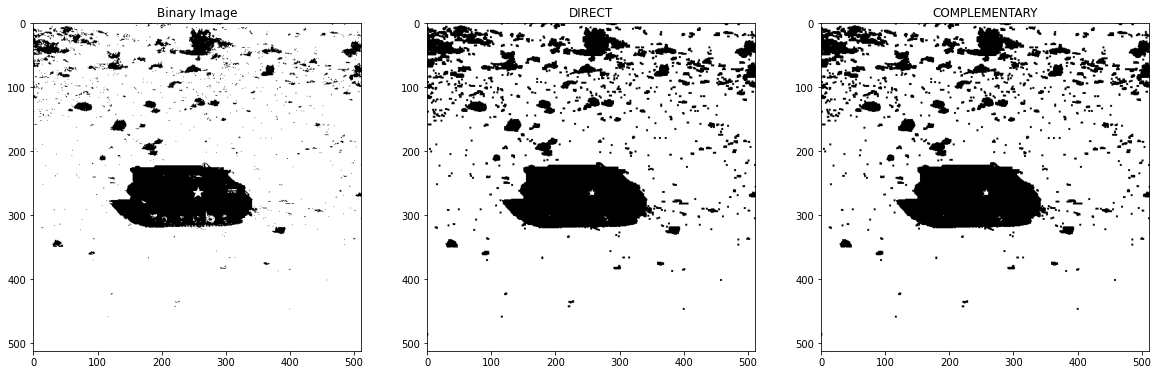

In [111]:
bin_apc_ero_c = NOT(DILATE(NOT(bin_apc), {'SQUARE':3}))
if np.all(bin_apc_ero_sq == bin_apc_ero_c):
    print("Difference between direct and complement path is zero.")
else:
    print("Difference between direct and complement path is not zero.")
    
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(1, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("DIRECT")
plt.imshow(bin_apc_ero_sq, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("COMPLEMENTARY")
plt.imshow(bin_apc_ero_c, cmap='gray')

#### (c) MEDIAN = NOT(MEDIAN(NOT))

Difference between direct and complement path is not zero.


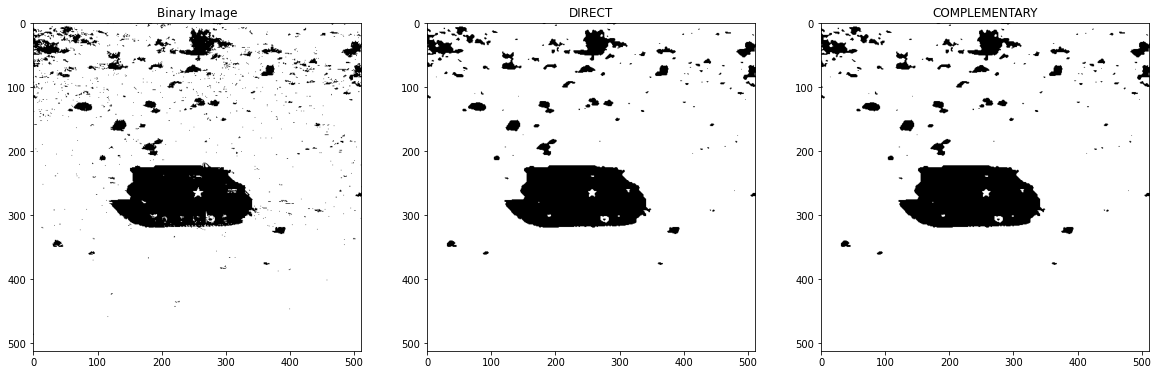

In [113]:
bin_apc_mea_c = NOT(MEDIAN(NOT(bin_apc), {'SQUARE':3}))
if np.all(bin_apc_mea_sq == bin_apc_mea_c):
    print("Difference between direct and complement path is zero.")
else:
    print("Difference between direct and complement path is not zero.")
    
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(1, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("DIRECT")
plt.imshow(bin_apc_mea_sq, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("COMPLEMENTARY")
plt.imshow(bin_apc_mea_c, cmap='gray')

### OPEN & CLOSE

In [122]:
def OPEN(I, B):
    return DILATE(ERODE(I, B), B)

def CLOSE(I, B):
    return ERODE(DILATE(I, B), B)

In [123]:
bin_apc_ope_cr = OPEN(bin_apc, {'CROSS': 5})
bin_apc_ope_sq = OPEN(bin_apc, {'SQUARE': 3})

bin_airport_ope_cr = OPEN(bin_airport, {'CROSS': 5})
bin_airport_ope_sq = OPEN(bin_airport, {'SQUARE': 3})

bin_airplane_ope_cr = OPEN(bin_airplane, {'CROSS': 5})
bin_airplane_ope_sq = OPEN(bin_airplane, {'SQUARE': 3})

bin_truck_ope_cr = OPEN(bin_truck, {'CROSS': 5})
bin_truck_ope_sq = OPEN(bin_truck, {'SQUARE': 3})

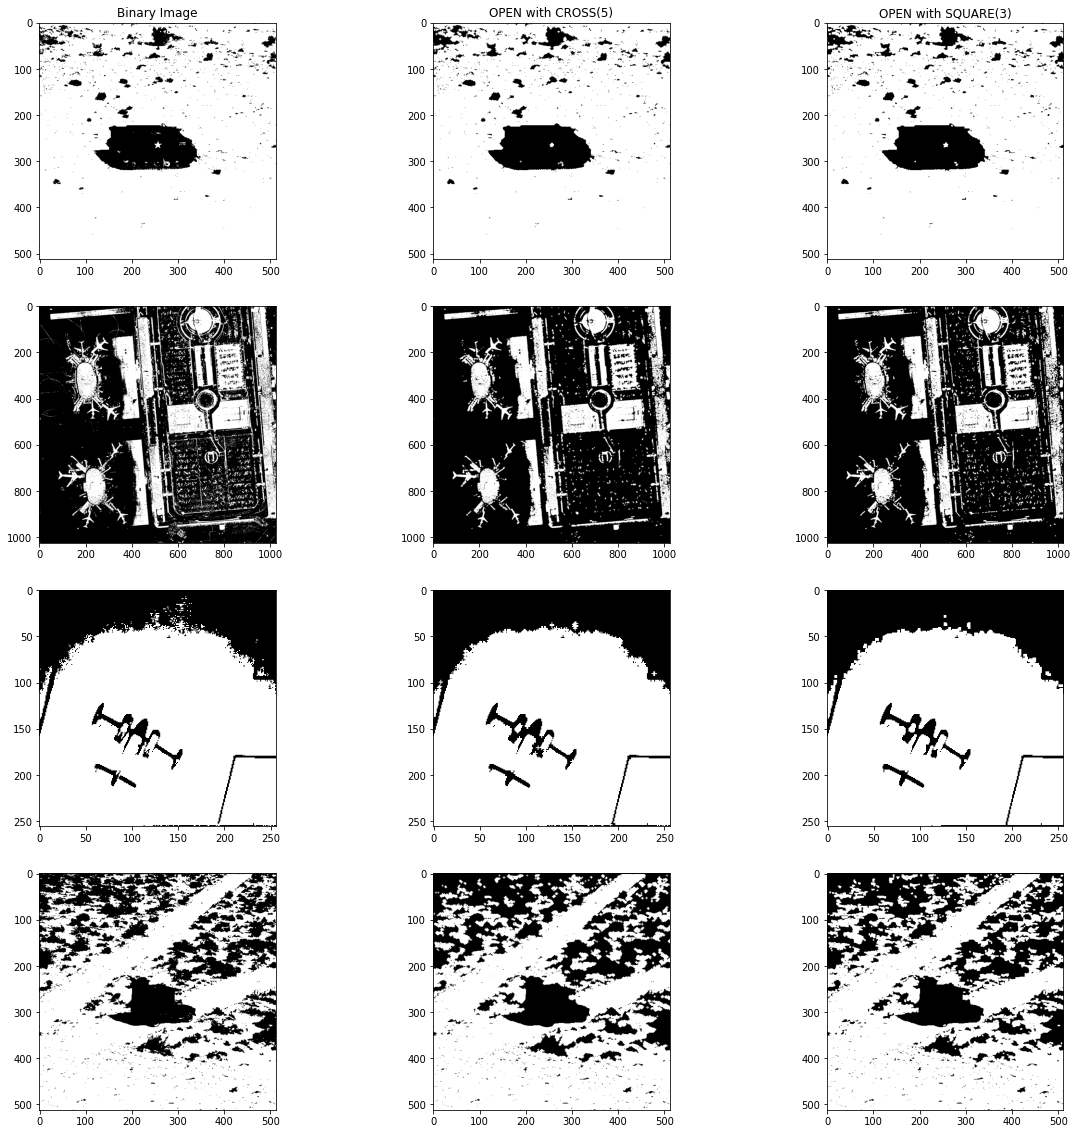

In [124]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4, 3, 1)
plt.title("Binary Image")
plt.imshow(bin_apc, cmap='gray')

plt.subplot(4, 3, 2)
plt.title("OPEN with CROSS(5)")
plt.imshow(bin_apc_ope_cr, cmap='gray')

plt.subplot(4, 3, 3)
plt.title("OPEN with SQUARE(3)")
plt.imshow(bin_apc_ope_sq, cmap='gray')

plt.subplot(4, 3, 4)
plt.imshow(bin_airport, cmap='gray')

plt.subplot(4, 3, 5)
plt.imshow(bin_airport_ope_cr, cmap='gray')

plt.subplot(4, 3, 6)
plt.imshow(bin_airport_ope_sq, cmap='gray')

plt.subplot(4, 3, 7)
plt.imshow(bin_airplane, cmap='gray')

plt.subplot(4, 3, 8)
plt.imshow(bin_airplane_ope_cr, cmap='gray')

plt.subplot(4, 3, 9)
plt.imshow(bin_airplane_ope_sq, cmap='gray')

plt.subplot(4, 3, 10)
plt.imshow(bin_truck, cmap='gray')

plt.subplot(4, 3, 11)
plt.imshow(bin_truck_ope_cr, cmap='gray')

plt.subplot(4, 3, 12)
plt.imshow(bin_truck_ope_sq, cmap='gray')